In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

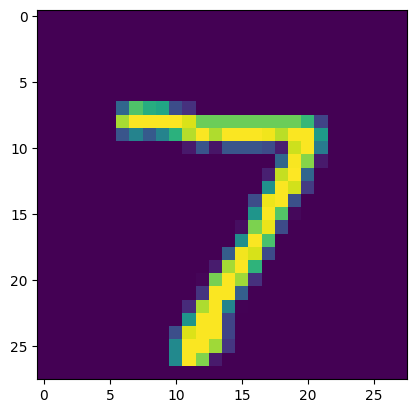

In [3]:
plt.imshow(X_test[0])

In [4]:
X_train = X_train/255
X_test = X_test/255

# AutoEncoder for Denoising Images

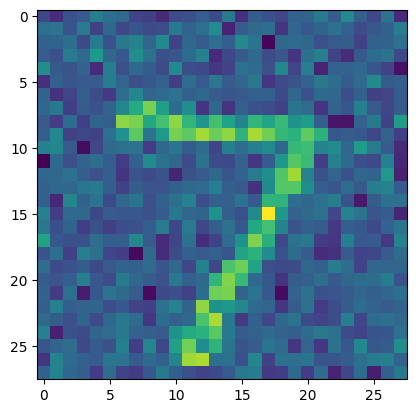

In [5]:
sample = GaussianNoise(0.2)
noisy = sample(X_test[0:2], training =True)
plt.imshow(noisy[0])

### Create  noise removal autoencoder and train it.

In [6]:
tf.random.set_seed(101)
np.random.seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [7]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [8]:
noise_remover = Sequential([encoder, decoder])
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])
noise_remover.fit(X_train, X_train, epochs=8,
                           validation_data=[X_test, X_test])

Epoch 1/8
1875/1875 [==============================] - 23s 7ms/step - loss: 0.1726 - accuracy: 0.1812 - val_loss: 0.1349 - val_accuracy: 0.2208
Epoch 2/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1306 - accuracy: 0.2287 - val_loss: 0.1212 - val_accuracy: 0.2362
Epoch 3/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1218 - accuracy: 0.2426 - val_loss: 0.1166 - val_accuracy: 0.2526
Epoch 4/8
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1171 - accuracy: 0.2507 - val_loss: 0.1113 - val_accuracy: 0.2563
Epoch 5/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1132 - accuracy: 0.2574 - val_loss: 0.1080 - val_accuracy: 0.2655
Epoch 6/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1104 - accuracy: 0.2634 - val_loss: 0.1061 - val_accuracy: 0.2657
Epoch 7/8
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1084 - accuracy: 0.2673 - val_loss: 0.1042 - val_accuracy: 

In [11]:
ten_noisy_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisy_images[0:10])

Original Digit


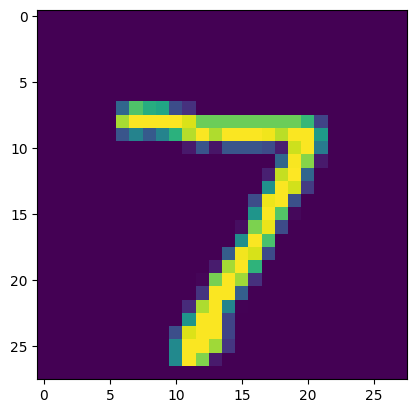

Noisy Digit


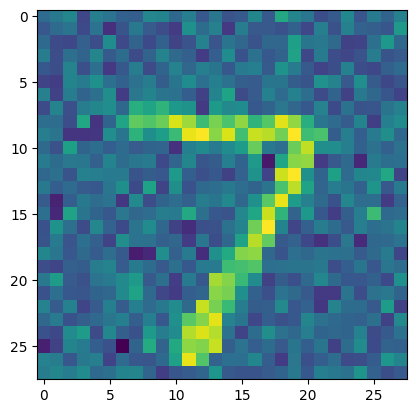

After Denoising


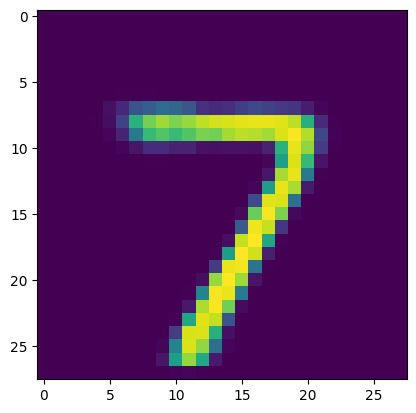

In [13]:
n = 0
print("Original Digit")
plt.imshow(X_test[n])
plt.show()
print("Noisy Digit")
plt.imshow(ten_noisy_images[n])
plt.show()
print("After Denoising")
plt.imshow(denoised[n])
plt.show()